In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from faker import Faker

# 1. 需要构造的字段

In [29]:
# 商机编号
# 1. 历史订单总数量－－－个,表名bi_behavior.bi_order_detail,customer_no/id进行计数
# 2. 历史订单总金额－－－元,表名bi_behavior.bi_order_detail,product_amount
# 3. 是否办理过贷款－－－１为是，０为否．表名bi_behavior.bi_order_detail，表名bi_behavior.bi_order_detail
# 4. 最近一次贷款距今时长－－－月,表名iboss2 db_iboss_rzsc.rzsc_product_order，取customer_no状态为status in(RZSCORDER_STATUS17,RZSCORDER_STATUS19)最新放款时间loan_time
# 5. 历史咨询次数－－－次,外呼  mongo中zh201903,durationsec进行统计
# 6. 历史平均通话时长－－－s/次,外呼mongo中zh201903,进行durationsec进行统计
# 7. 客户是否添加商务微信－－－1为是，０为否．＿＿＿＿＞和李良沟通
# 8. 商务会见次数---次，表名bi_behavior.bi_visit_detail，"customer_name 计数  同时用status_name过滤出已到访"
# 9. 备注是否包含贷款或资金---1为是，０为否．表名：db_iboss2.uc_customer_record，content
# 10. １０字备注以上备注个数－－－个.名：db_iboss2.uc_customer_record，content
# 11. 客户掉库总次数／被剔除总数（１８０天）---次,db_iboss2.uc_customer_record,"remark_type 值为BUS_701 代表被剔除，进行统计"
# 12. 客户投诉公司次数（１８０天）---次，不好处理，线下的都是客户名称，也不好匹配．很难拿到

# ２.构造函数

In [30]:
def create_chisquare(freedom,num,column):
    """1.构造卡方分布的特征的函数"""
    import numpy as np
    import pandas as pd
    np.random.seed(22)
    data = np.ceil(np.random.chisquare(df=freedom,size=num))
    df = pd.DataFrame(data,columns=[column])
    plt.figure()
    sns.distplot(df)
    plt.show()
    return df
# create_chisquare(freedom=38,num=2000,column="age").head(3) #构造年龄
def create__double_chisquare(freedom1,num1,freedom2,num2,column):
    """2.构造卡方分布的双峰的特征函数，freedom为自由度，num为个数，column为特征名字"""
    import numpy as np
    import pandas as pd
    np.random.seed(22)
    data1 = np.ceil(np.random.chisquare(df=freedom1,size=num1))
    data2 = np.ceil(np.random.chisquare(df=freedom2,size=num2))
    df = pd.DataFrame(np.hstack((data1,data2)),columns=[column])
    plt.figure()
    sns.distplot(df)
    plt.show()
    return df
def create_normal(num,mean,stddev,column,seed=0,):
    """3.构造服从正态分布的整数,返回数据框"""
    data = np.random.normal(loc=mean,scale=stddev,size=num,seed=seed)
    df = pd.DataFrame(np.ceil(data)).T
    df.columns =[column]
    return df
def create_possion(num,mean,column):
    """4.生成服从泊松分布的特征的函数，mean为均值"""
    import numpy as np
    np.random.seed(22)
    data = np.random.poisson(lam=mean,size = num)
    df = pd.DataFrame(data,columns=[column])
    plt.figure()
    plt.hist(list(data))
    plt.show()
    return df
# create_possion(mean=5.0,num=1000,column="notetimes").head() #生成备注条数，平均5条
# create_possion(mean=5.0,num=1000,column="call_times").head() #生成电话跟进次数
def create_gamma(shape,scale,num,column):
    """构造服从Gamma分布的特征的函数，"""
    import numpy as np
    import pandas as pd
    np.random.seed(22)
    data =np.ceil(np.random.gamma(shape=shape,scale=scale,size=num))
    plt.figure()
    sns.distplot(data)
    plt.show()
    df = pd.DataFrame(data,columns=[column])
    return df
# create_gamma(shape=500.0,scale=8,num=1000,column="call_seconds").head(3) #通话时长
def create_str(num,list_like,weights,column):
    """用于构造一个类别型/离散型特征的函数，num：样本个数,list_like：一个列表或者一维数组，weights为有回抽样的权重列表"""
    import numpy as np
    np.random.seed(22)
    weights_sum = np.array(weights).sum()
    if weights_sum != 1.0:
        print("请确保输入的权重之和为1")
        return None
    else:
        Str = np.random.choice(list_like,size=num,replace=True,p=weights)
        df = pd.DataFrame(Str,columns=[column])
        return df
# 利用faker生成数据
fake = Faker(locale="zh_CN")
def create_name(num):
    """构造人名的函数，num为需要构造的数量，返回一个列表"""
    random.seed(0)
    name = []
    for i in range(num):
        name.append(fake.name())
    userid = pd.DataFrame(name,columns=["客户名称"])
    return userid
# create_name(10)
def create_nan(num,column):
    """创建全是nan的数据框的函数"""
    data = [np.NaN for i in range(num)]
    df = pd.DataFrame(data=data,columns=[column])
    return df
def create_zeros(num,column):
    """创建全是０的数据框的函数"""
    data = np.zeros((num,1))
    df = pd.DataFrame(data = data,columns = [column])
    return df

# 3.构造数据

In [31]:
num = 371527 #构造的商机个数

In [32]:
business_id = pd.read_excel("二分类数据.xlsx")
business_id.head()
business_id = business_id.reset_index()

In [56]:
bus_id = [str(i) for i in business_id["table_id"]]
bus_id = list(set(bus_id))
print(len(bus_id))
type(bus_id[0])

371516


str

In [57]:
# 1.商机编号
bus_id = pd.DataFrame(bus_id,columns = ["商机编号"])
bus_id.head()

,商机编号
0,7773087564327821312
1,2509235
2,7761459146481999872
3,7688345355146375168
4,7724724297696288768


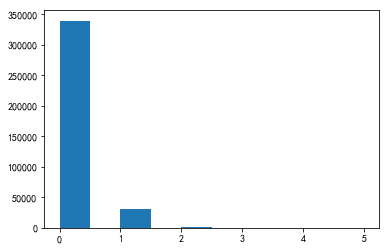

32036


,历史融资订单数量
0,0
1,0
2,0
3,0
4,0


In [36]:
# 2. 历史订单总数量
order_quantity = create_possion(column="历史融资订单数量",mean=0.09,num = num)
print((order_quantity["历史融资订单数量"] > 0).sum())
order_quantity.head()

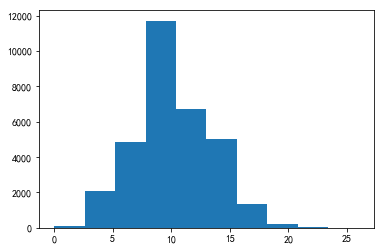

,历史融资订单数量,融资订单总金额
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [37]:
# 3. 订单总金额
df1 = pd.concat([order_quantity,create_zeros(column="融资订单总金额",num=50000)],axis = 1)
num1 = len(df1.loc[df1["历史融资订单数量"] > 0,:])
df1.loc[df1["历史融资订单数量"] > 0,"融资订单总金额"]  = create_possion(column="融资订单总金额",mean=10,num=num1)
df1.head()

In [38]:
# 4. 是否办理过贷款
df2 = pd.concat([order_quantity,create_zeros(column="是否办理过贷款",num=num)],axis = 1)
num1 = len(df1.loc[df1["历史融资订单数量"] > 0,:])
df2.loc[df1["历史融资订单数量"] > 0,"是否办理过贷款"]  = "是"
df2.loc[df1["历史融资订单数量"] == 0,"是否办理过贷款"]  = "否"
df2.head()

,历史融资订单数量,是否办理过贷款
0,0,否
1,0,否
2,0,否
3,0,否
4,0,否


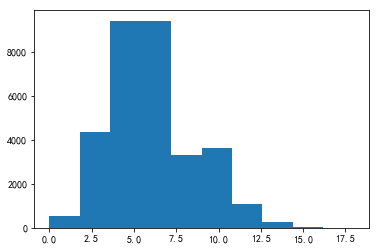

,历史融资订单数量,最近一次贷款最今时长
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN


In [39]:
# 5. 最近一次贷款距今时长
df3 = pd.concat([order_quantity,create_nan(column="最近一次贷款最今时长",num=num)],axis = 1)
num1 = len(df1.loc[df1["历史融资订单数量"] > 0,:])
df3.loc[df1["历史融资订单数量"] > 0,"最近一次贷款最今时长"]  = create_possion(column="最近一次贷款最今时长",mean=6,num=num1)
df3.head()

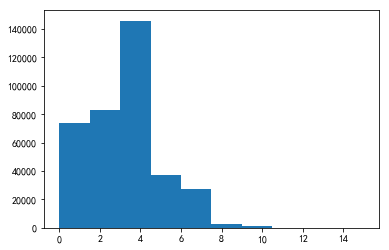

In [40]:
# 6. 历史咨询次数
consult_frequency = create_possion(column="商机历史咨询次数",mean=3,num=num)

/home/sundali/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


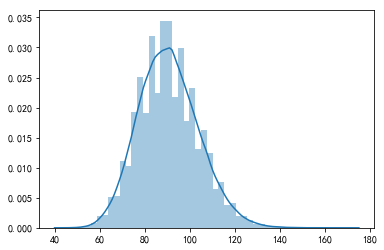

In [41]:
# 7. 商机历史平均通话时长
avg_length_call = create_chisquare(column="商机历史平均通话时长",freedom=90,num=num)

In [42]:
l1 = [1,2,3,4,5]
l2 = [2,3]
set(l1).difference(set(l2))

{1, 4, 5}

In [44]:
# 8. 是否添加商务微信
import random
add_wechat = create_nan(column="是否添加商务微信",num=num)
index1 = random.sample(population = list(add_wechat.index),k = int(num*0.4))
index2 = random.sample(population = set(add_wechat.index).difference(set(index1)),k = int(num*0.4))
add_wechat.ix[index1,"是否添加商务微信"] = "是"
add_wechat.ix[index2,"是否添加商务微信"] = "否"
add_wechat.head()

/home/sundali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/sundali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


,是否添加商务微信
0,NaN
1,是
2,NaN
3,是
4,否


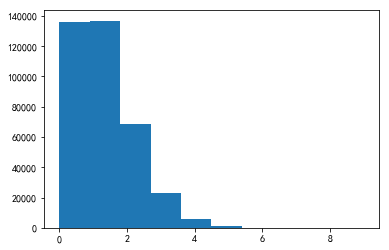

In [45]:
# 9. 商机与商务会面次数
meeting_quantity = create_possion(column="商机与商务会面次数",mean=1,num=num)

In [46]:
# 10. 备注是否包含贷款或资金
conclude_words = create_nan(column ="备注是否包含关键字",num=num)
index3 = random.sample(population = list(conclude_words.index),k = int(num*0.4))
index4 = random.sample(population = set(conclude_words.index).difference(set(index3)),k = int(num*0.58))
conclude_words.ix[index３,"备注是否包含关键字"] = "是"
conclude_words.ix[index４,"备注是否包含关键字"] = "否"
conclude_words.head()

/home/sundali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/home/sundali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,备注是否包含关键字
0,否
1,否
2,NaN
3,否
4,否


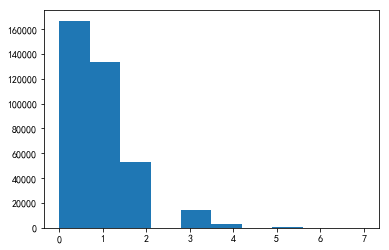

,10字以上备注条数
0,0
1,1
2,1
3,0
4,0


In [47]:
# 11. 商机10字以上备注条数
ten_words = create_possion(column="10字以上备注条数",mean=0.8,num=num)
ten_words.head()

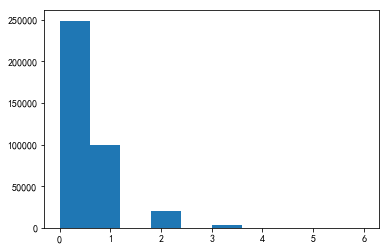

,商机被客户剔除次数
0,0
1,0
2,0
3,1
4,0


In [48]:
# 12. 商机被客户剔除次数
eliminated_quantity = create_possion(column="商机被客户剔除次数",mean=0.4,num=num)
eliminated_quantity.head()

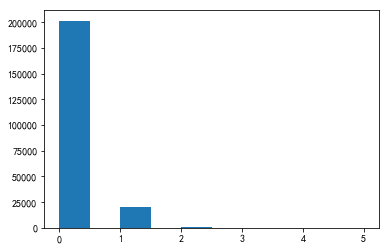

/home/sundali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,客户投诉公司次数
0,0.0
1,NaN
2,NaN
3,NaN
4,0.0


In [49]:
# 1３.　客户投诉公司次数
complaint_times = create_nan(column ="客户投诉公司次数",num=num)
index5 = random.sample(population = list(complaint_times.index),k = int(num*0.6))
complaint_times.ix[index5,:] = create_possion(column="客户投诉公司次数",mean=0.1,num = len(index5))
complaint_times.head()

In [58]:
data = pd.concat([bus_id,order_quantity,df1["融资订单总金额"],df2["是否办理过贷款"],
                 df3["最近一次贷款最今时长"],consult_frequency,avg_length_call,add_wechat,
                 meeting_quantity,conclude_words,ten_words,eliminated_quantity,complaint_times],axis = 1)
data.head()

,商机编号,历史融资订单数量,融资订单总金额,是否办理过贷款,最近一次贷款最今时长,商机历史咨询次数,商机历史平均通话时长,是否添加商务微信,商机与商务会面次数,备注是否包含关键字,10字以上备注条数,商机被客户剔除次数,客户投诉公司次数
0,7773087564327821312,0,0.0,否,NaN,2,89.0,NaN,0,否,0,0,0.0
1,2509235,0,0.0,否,NaN,3,72.0,是,1,否,1,0,NaN
2,7761459146481999872,0,0.0,否,NaN,3,83.0,NaN,1,NaN,1,0,NaN
3,7688345355146375168,0,0.0,否,NaN,4,77.0,是,0,否,0,1,NaN
4,7724724297696288768,0,0.0,否,NaN,6,98.0,否,0,否,0,0,0.0


In [59]:
data.to_csv("business_12.csv",index=False,encoding="utf_8_sig",sep=",")